In [12]:
# packages for data Exploration
import torch
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer, RegexpTokenizer, sent_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import re

In [13]:
# connect to GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [14]:
# open german txt file
with open ("/home/chanhwi/workspace/Transformer_Reimplementation/dataset/train.de", "r") as f:
    txt_de = f.read()
    

# open english txt file
with open ("/home/chanhwi/workspace/Transformer_Reimplementation/dataset/train.en", "r") as f:
    txt_en = f.read()
    

In [15]:
# make token library using TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

tokenized_de = tokenizer.tokenize(txt_de)
tokenized_en = tokenizer.tokenize(txt_en)

# make token library using text_to_word_sequence

t2w_tokenized_de = text_to_word_sequence(txt_de)
t2w_tokenized_en = text_to_word_sequence(txt_en)

In [16]:
# remove stopwords
stop_words = set(stopwords.words('english') + [',', '.', ':', ';', '–', '--', ' ']) 

clean_words_de = []
for word in tokenized_de: 
    if word not in stop_words: #불용어 제거
        clean_words_de.append(word)


clean_words_en = []
for word in tokenized_en: 
    if word not in stop_words: #불용어 제거
        clean_words_en.append(word)
        
        
clean_words_de_2 = []
for word in t2w_tokenized_de: 
    if word not in stop_words: #불용어 제거
        clean_words_de_2.append(word)
        

clean_words_en_2 = []
for word in t2w_tokenized_en:
    if word not in stop_words: #불용어 제거
        clean_words_en_2.append(word)

In [17]:
# number of tokens in each corpus

print('# of tokens in german txt :', len(clean_words_de))
print('# of tokens in english txt :', len(clean_words_en))

print('# of tokens in german txt :', len(clean_words_de_2))
print('# of tokens in english txt :', len(clean_words_en_2))

# of tokens in german txt : 3077933
# of tokens in english txt : 1971518
# of tokens in german txt : 3029024
# of tokens in english txt : 1624313


In [18]:
# token counter function

from collections import Counter

def count_elements(list_of_words):
    return dict(Counter(list_of_words))

In [19]:
# dataframe of german top-10 word frequency by TreebankWordTokenizer

df_clean_words_de = pd.DataFrame(list(count_elements(clean_words_de).items()),
                                      columns=['word','# of word'])

df_clean_words_de.sort_values(by=['# of word'], ascending=False).head(10)

,word,# of word
27,die,82841
32,und,74447
23,der,54388
3,ist,46910
16,das,44620
54,zu,42902
147,ich,38659
33,wir,37369
95,es,35002
145,Sie,31047


In [20]:
from wordcloud import WordCloud

In [21]:
counts_de_1 = Counter(clean_words_de)
tags_de_1 = counts_de_1.most_common(1000) 

wc_de_1 = WordCloud(background_color="white", max_font_size=60)
cloud_de_1 = wc_de_1.generate_from_frequencies(dict(tags_de_1))

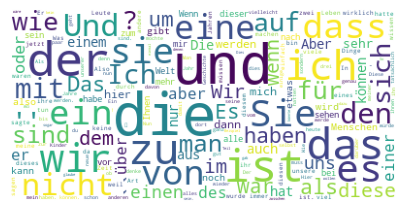

In [23]:
plt.figure(figsize=(5, 4))
plt.axis('off')
plt.imshow(cloud_de_1)
plt.show()

In [24]:
# dataframe of german top-10 word frequency by t2w

df_t2w_tokenized_de = pd.DataFrame(list(count_elements(clean_words_de_2).items()),
                                      columns=['word','# of word'])

df_t2w_tokenized_de.sort_values(by=['# of word'], ascending=False).head(10)

,word,# of word
30,und,99791
25,die,91239
37,sie,61020
2,das,58921
6,ich,58315
21,der,57409
3,ist,51452
9,wir,49270
87,es,48474
49,zu,43506


In [25]:
counts_de_2 = Counter(clean_words_de_2)
tags_de_2 = counts_de_2.most_common(1000) 

wc_de_2 = WordCloud(background_color="white", max_font_size=60)
cloud_de_2 = wc_de_2.generate_from_frequencies(dict(tags_de_2))

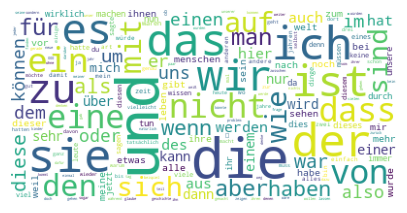

In [26]:
plt.figure(figsize=(5, 4))
plt.axis('off')
plt.imshow(cloud_de_2)
plt.show()

In [27]:
# dataframe of english top-10 word frequency by TreebankWordTokenizer
df_clean_words_en = pd.DataFrame(list(count_elements(clean_words_en).items()),
                                      columns=['word','# of word'])

df_clean_words_en.sort_values(by=['# of word'], ascending=False).head(10)

,word,# of word
5,I,63584
22,'s,43980
9,And,34958
153,?,17395
383,So,17269
204,n't,16775
130,'',14448
10,'re,13206
89,It,12519
121,``,12231


In [28]:
counts_en_1 = Counter(clean_words_en)
tags_en_1 = counts_en_1.most_common(1000) 

wc_en_1 = WordCloud(background_color="white", max_font_size=60)
cloud_en_1 = wc_en_1.generate_from_frequencies(dict(tags_en_1))

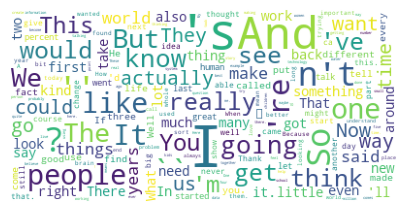

In [29]:
plt.figure(figsize=(5, 4))
plt.axis('off')
plt.imshow(cloud_en_1)
plt.show()

In [30]:
# dataframe of english top-10 word frequency by t2w
df_t2w_tokenized_en = pd.DataFrame(list(count_elements(clean_words_en_2).items()),
                                      columns=['word','# of word'])

df_t2w_tokenized_en.sort_values(by=['# of word'], ascending=False).head(10)

,word,# of word
121,one,13637
50,like,12544
113,people,12381
668,know,9095
7,going,9027
16,that's,8256
32,think,8167
48,see,8053
199,really,7649
350,would,7453


In [31]:
counts_en_2 = Counter(clean_words_en_2)
tags_en_2 = counts_en_2.most_common(1000) 

wc_en_2 = WordCloud(background_color="white", max_font_size=60)
cloud_en_2 = wc_en_1.generate_from_frequencies(dict(tags_en_2))

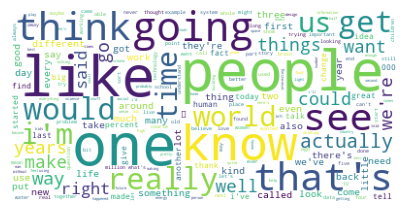

In [32]:
plt.figure(figsize=(5, 4))
plt.axis('off')
plt.imshow(cloud_en_1)
plt.show()

/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36865 (\N{CJK UNIFIED IDEOGRAPH-9001}) missing from current font.
  

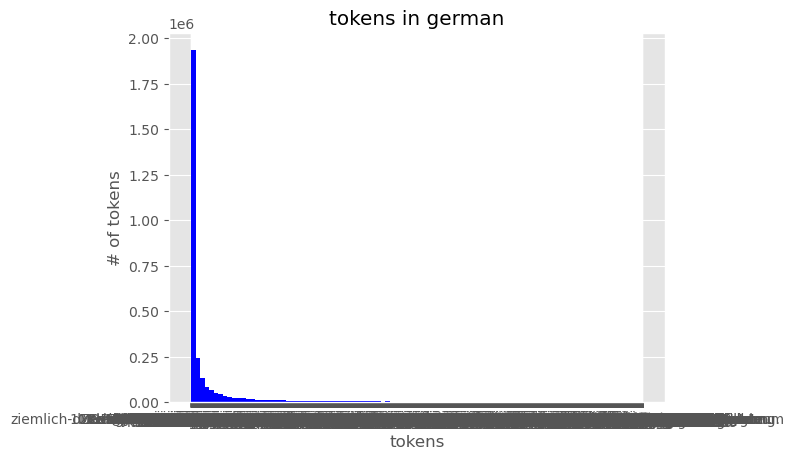

In [ ]:
# histogram of german word frequency 
plt.style.use('ggplot')
plt.title('tokens in german')
plt.xlabel('tokens')
plt.ylabel('# of tokens')
plt.hist(clean_words_de, bins=100, color='blue')
plt.show()

/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(byte

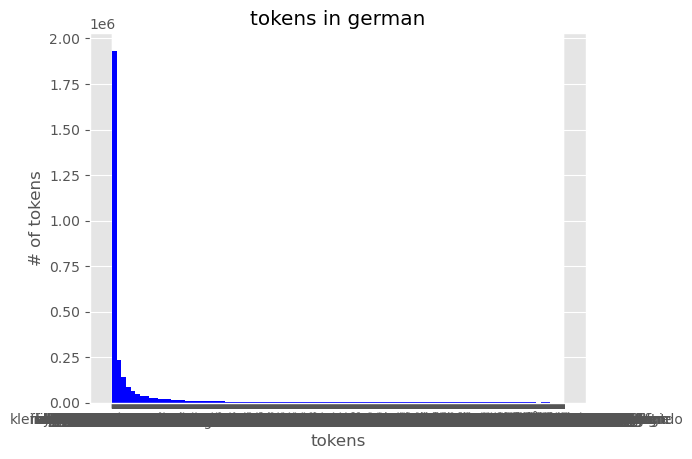

In [ ]:
# histogram of german word frequency 
plt.style.use('ggplot')
plt.title('tokens in german')
plt.xlabel('tokens')
plt.ylabel('# of tokens')
plt.hist(clean_words_de_2, bins=100, color='blue')
plt.show()

/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyp

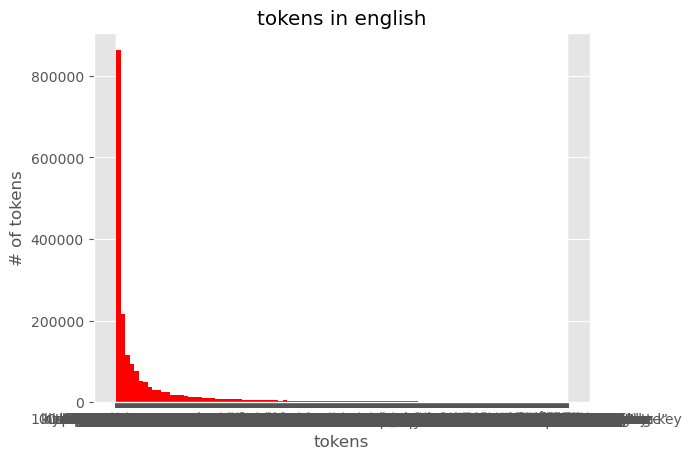

In [ ]:
# histogram of english word frequency 
plt.style.use('ggplot')
plt.title('tokens in english')
plt.xlabel('tokens')
plt.ylabel('# of tokens')
plt.hist(clean_words_en, bins=100, color='red')
plt.show()

/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chanhwi/anaconda3/envs/tf_reimple/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyp

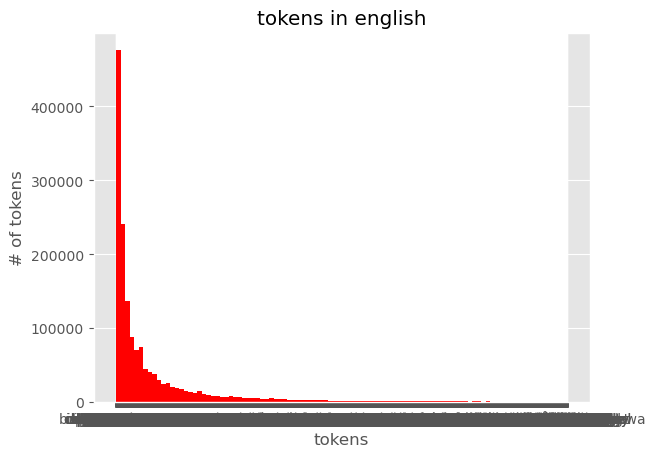

In [33]:
# histogram of english word frequency 
plt.style.use('ggplot')
plt.title('tokens in english')
plt.xlabel('tokens')
plt.ylabel('# of tokens')
plt.hist(clean_words_en_2, bins=100, color='red')
plt.show()